## Online Shoppers Purchasing Intention

### Project Objectives 
The following are the objectives of this project 

1. How does user behavior change for shopping on weekend vs weekday.
2. Effect of Returning Visitors on Revenue.
3. Influence of Bounce Rates on Product Purchase Decision.
4. The Impact of Page Value on Revenue Generation.

#### Where is the data source location?
Found it online
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset


In [1]:
#import the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr #Used this for Computing Spearman correlation coefficient
from scipy.stats import ttest_ind #Used this for performing an independent two-sample t-test

In [2]:
#Loading the dataset directly using the url link
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

#Implementing error handling to manage issues during the request process to web server. 
try:
    df = pd.read_csv(url)
    # Now 'df' contains the data from the CSV file
except pd.errors.EmptyDataError:
    print("The CSV file is empty or could not be read.")
except pd.errors.ParserError as e:
    print(f"Error parsing CSV: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [3]:
# Display the first few rows of the dataset
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Descriptive statistics
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Check for null values in data
print('Data columns with null values:',df.isnull().sum())

Data columns with null values: Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [7]:
nullcount = df.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


### Distribution of Completed and Non-Completed Transactions

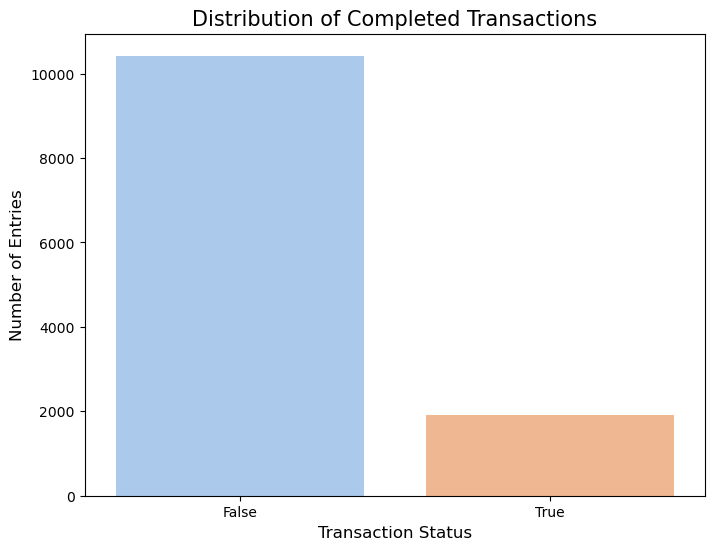

In [8]:
# Visualize the data
# Ensuring that the 'Revenue' column is treated as a categorical variable with True (completed transaction) and False (non-completed transaction) values.
df['Revenue'] = df['Revenue'].astype(bool)

#Plotting the graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=df, palette='pastel')

plt.title('Distribution of Completed Transactions', fontsize=15)
plt.xlabel('Transaction Status', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.show()

### Observation:
1. Total number of transactions are 12,330.
2. Successfull completion of transaction entries are 10,422 and not completed are 1908.

## Hypothesis 1: The Impact of Page Value on Revenue Generation

What is PageValue?

- Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).

Null Hypothesis (H0): There is no correlation between 'PageValues' and 'Revenue' in the population.

Alternative Hypothesis (H1): There is a correlation between 'PageValues' and 'Revenue' in the population.

In [9]:
# Calculate the correlation coefficient and p-value between 'PageValues' and 'Revenue'
# The Spearman rank correlation is particularly useful when dealing with variables that exhibit a monotonic relationship which means that as one variable increases, the other variable consistently increases or decreases, but not necessarily at a constant rate.
# correlation_coefficient gives you an indication of the strength and direction of the monotonic relationship between 'PageValues' and 'Revenue.'
# p_value helps you assess the statistical significance of this observed relationship.

correlation_coefficient, p_value = spearmanr(df['PageValues'], df['Revenue'])

# Print the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant at a significance level of 0.05
if p_value < 0.05:
    print("There is a correlation between 'PageValues' and 'Revenue' in the population.")
else:
    print("There is no correlation between 'PageValues' and 'Revenue' in the population.")


Correlation Coefficient: 0.6263627593256479
P-value: 0.0
There is a correlation between 'PageValues' and 'Revenue' in the population.


In [10]:
# Statistical summary
page_values_by_revenue = df.groupby('Revenue')['PageValues'].describe()
print(page_values_by_revenue)

           count       mean        std  min       25%        50%        75%  \
Revenue                                                                       
False    10422.0   1.975998   9.072424  0.0  0.000000   0.000000   0.000000   
True      1908.0  27.264518  35.191954  0.0  3.641144  16.758134  38.897742   

                max  
Revenue              
False    246.758590  
True     361.763742  


C:\Users\91970\AppData\Local\Temp\ipykernel_17968\1672241433.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


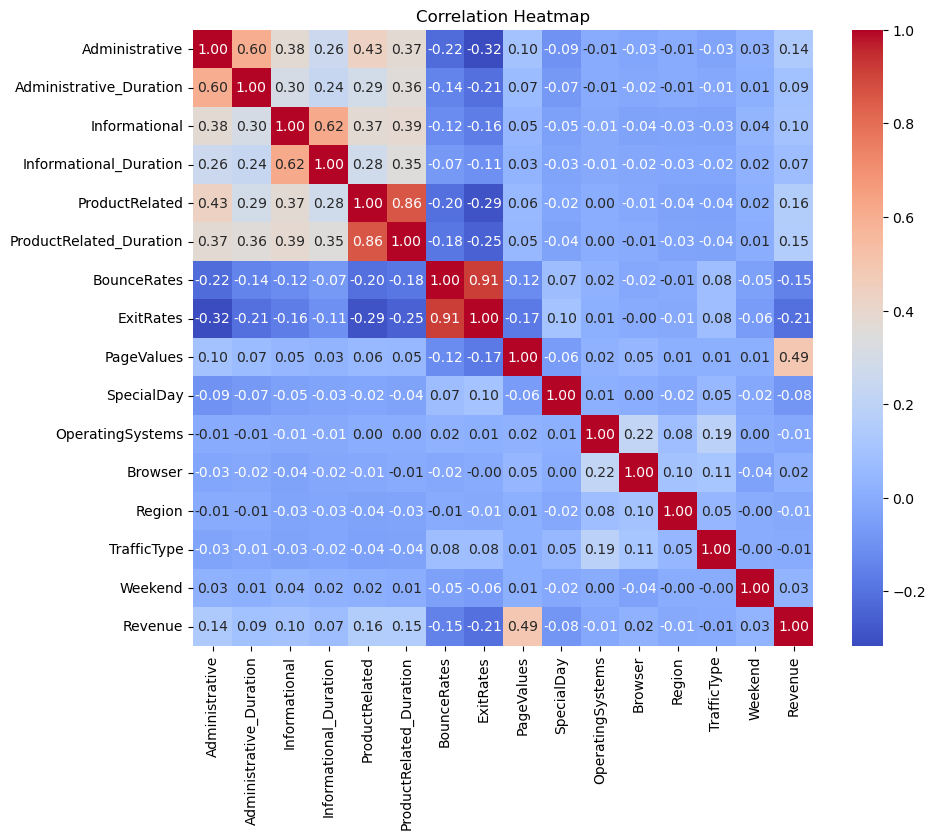

In [11]:
#Plotting the heat map to analyze the relationship between revenue and page value. 
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Observation:
1. The average PageValue is significantly higher for sessions that result in revenue (True) compared to those without revenue (False).
2. Sessions with revenue have a higher variability in PageValues, as indicated by the larger standard deviation.
3. There is a high correlation with page values and revenue
4. There is a moderate tendency that as Page Values increase, the likelihood of generating higher revenue also increases.

## Hypothesis 2: Effect of Returning Visitors on Revenue:

Null Hypothesis (H0): Returning visitors are not likely to contribute to revenue generation compared to new visitors.

Alternative Hypothesis (H1): Returning visitors are likely to contribute to revenue generation compared to new visitors.

In [12]:
# This code creates two subsets of the DataFrame df based on the 'VisitorType' column. It filters rows where the 'VisitorType' is either 'Returning_Visitor' or 'New_Visitor'.
returning_visitors = df[df['VisitorType'] == 'Returning_Visitor']['Revenue']
new_visitors = df[df['VisitorType'] == 'New_Visitor']['Revenue']

# Perform one-sided two-sample t-test
#This function is used for an independent samples t-test.
#Indicates that the test is one-sided, and we are interested in whether the mean of the first group (returning_visitors) is greater than the mean of the second group (new_visitors).
t_stat, p_value = ttest_ind(returning_visitors, new_visitors, alternative='greater')

# Significance Level
alpha = 0.05

# Decision Rule
if p_value < alpha:
    print("Reject the Null Hypothesis:")
    print("Returning visitors are likely to contribute to revenue generation compared to new visitors.")
else:
    print("Fail to Reject the Null Hypothesis:")
    print("There is no evidence that returning visitors are more likely to contribute to revenue compared to new visitors.")

Fail to Reject the Null Hypothesis:
There is no evidence that returning visitors are more likely to contribute to revenue compared to new visitors.


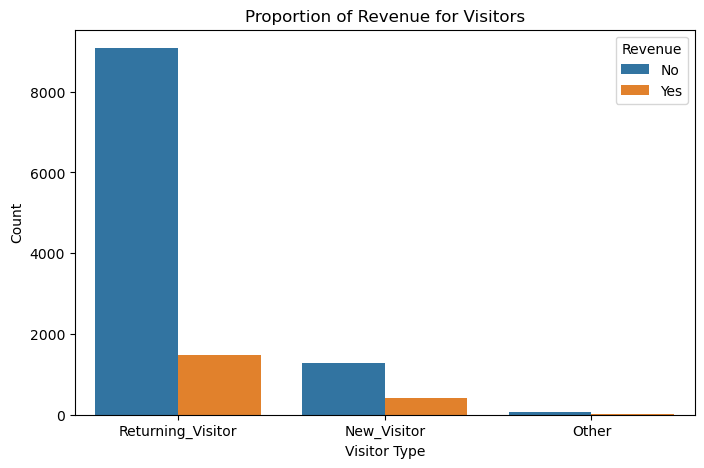

In [13]:
# Bar plot to compare the proportion of revenue for returning and new visitors
plt.figure(figsize=(8, 5))
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title('Proportion of Revenue for Visitors')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.legend(title='Revenue', labels=['No', 'Yes'], loc='upper right')  # Adding legend for boolean values
plt.show()

### Observation:
1. There is no significant relation between returning visitors adding more revenue than new visitors.

## Hypothesis 3:  Influence of Bounce Rates on Product Purchase Decision

Null Hypothesis (H0): Bounce rates have no significant influence on the likelihood of purchasing a product. 

Alternative Hypothesis (H1): Bounce rates significantly influence the likelihood of purchasing a product. 

What is a BounceRate?

 - The percentage of visitors who enter the website through that page and exit without triggering any additional tasks or completing the transaction.

In [14]:
# Dividing high and low bounce rates based on the mean
high_bounce_rates = df[df['BounceRates'] > df['BounceRates'].mean()]
low_bounce_rates = df[df['BounceRates'] <= df['BounceRates'].mean()]

# Perform a t-test to compare the means of revenue for high and low bounce rates
# t-test is used to determine whether there is a statistically significant difference in the mean revenue between the two subsets.
t_statistic, p_value = ttest_ind(high_bounce_rates['Revenue'], low_bounce_rates['Revenue'])

# Significance Level
alpha = 0.05

# Check if the p-value is below the significance level
if p_value < alpha:
    print("Reject the Null Hypothesis:")
    print("Bounce rates significantly influence the likelihood of purchasing a product.")
else:
    print("Fail to Reject the Null Hypothesis:")
    print("Bounce rates have no significant influence on the likelihood of purchasing a product. There is no difference in the mean revenue between pages with high and low bounce rates.")

Reject the Null Hypothesis:
Bounce rates significantly influence the likelihood of purchasing a product.


C:\Users\91970\AppData\Local\Temp\ipykernel_17968\1621671883.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='Revenue', y='BounceRates', data=df, kind='strip', palette='muted')


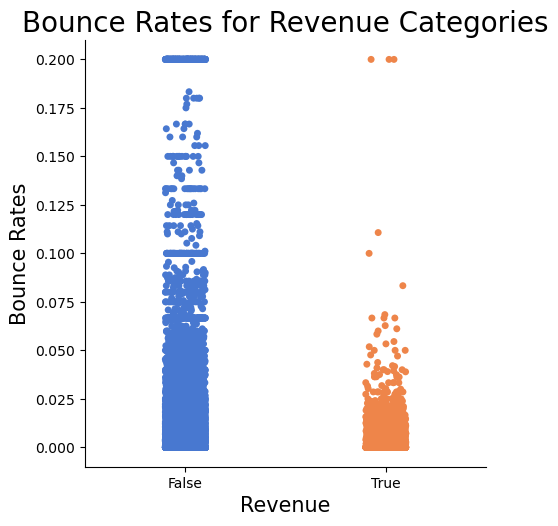

In [15]:
plt.rcParams['figure.figsize'] = (8, 5)

# Use catplot for categorical data
sns.catplot(x='Revenue', y='BounceRates', data=df, kind='strip', palette='muted')
plt.title('Bounce Rates for Revenue Categories', fontsize=20)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Bounce Rates', fontsize=15)
plt.show()

#### Observations:
   1. We see here BounceRates is exponentially distributed for both purchased(True) or not puchased(False).
   2. BounceRates is highly influenced to buy a product or not.

## Hypothesis 4:   Weekend Influence on Revenue

Null Hypothesis (H0): There is no significant difference in revenue between weekends and weekdays. 

Alternative Hypothesis (H1): Weekends are associated with higher revenue compared to weekdays. 

In [16]:
# These lines create two subsets of the original DataFrame (df): weekend_revenue includes rows where 'Weekend' is True, 
# and weekday_revenue includes rows where 'Weekend' is False. They focus on the 'Revenue' column.
weekend_revenue = df[df['Weekend'] == True]['Revenue']
weekday_revenue = df[df['Weekend'] == False]['Revenue']

# Perform a t-test to compare the means of revenue between weekends and weekdays.
t_statistic, p_value = ttest_ind(weekend_revenue, weekday_revenue)

# Significance Level
alpha = 0.05

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is below the significance level
if p_value < alpha:
    print("Reject the Null Hypothesis:")
    print("Weekends are associated with higher revenue compared to weekdays.")
else:
    print("Fail to Reject the Null Hypothesis:")
    print("There is no significant difference in revenue between weekends and weekdays.")


T-Statistic: 3.2541061084418708
P-value: 0.0011405626259631285
Reject the Null Hypothesis:
Weekends are associated with higher revenue compared to weekdays.


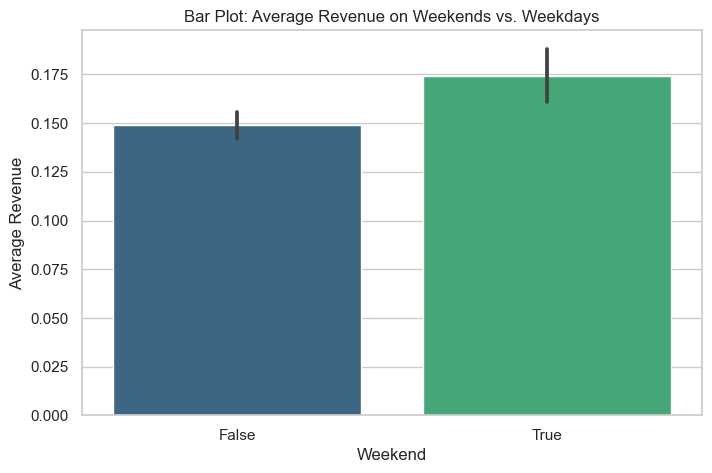

In [17]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Bar plot for Weekend and Average Revenue
plt.figure(figsize=(8, 5))
sns.barplot(x='Weekend', y='Revenue', data=df, palette='viridis')
plt.title('Bar Plot: Average Revenue on Weekends vs. Weekdays')
plt.xlabel('Weekend')
plt.ylabel('Average Revenue')
plt.show()


In [18]:
#Statistical summary of weekend based on revenue
revenue_by_weekend_summary = df.groupby('Weekend')['Revenue'].agg(['mean', 'median', 'std'])

# Print the statistical summary
print(revenue_by_weekend_summary)

             mean  median       std
Weekend                            
False    0.148911     0.0  0.356020
True     0.173989     0.0  0.379166


#### Observations:
   1. On average, there is a slightly higher 'Revenue' on weekends compared to weekdays.
   2. Weekends are associated with statistically higher 'Revenue' compared to weekdays.